In [212]:
import pandas as pd 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [213]:
ex1data = "C:/Anaconda3/Notebooks/machine-learning-demo/courseraML/ex1/data/ex1data.data"

In [214]:
data = pd.read_csv(ex1data,sep=",",names=['population','profit'],header=0)

In [215]:
data.shape

(96, 2)

In [216]:
data.head(5)

,population,profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [217]:
data.columns

Index(['population', 'profit'], dtype='object')

In [218]:
X = data.loc[0:,['population']]

In [219]:
X.head(5)

,population
0,5.5277
1,8.5186
2,7.0032
3,5.8598
4,8.3829


In [220]:
y = data.loc[0:,['profit']]

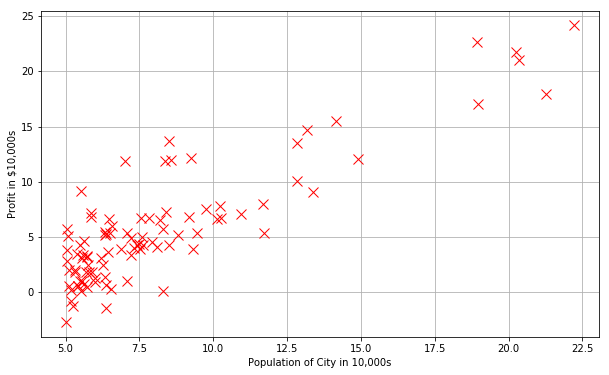

In [221]:
#Plot the data to see what it looks like
plt.figure(figsize=(10,6))
plt.plot(X,y,'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [222]:
#Get the matrix from dataframe using numpy
features = np.matrix(X)
labels = np.matrix(y)

In [223]:
#bias = np.ones((features.shape[0],1))
#features =  np.append(bias, features,axis=1)
#features[0]

In [224]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta.T)

In [225]:
#Cost function which gives rmse - root mean squared error
def costfunction(featureValues, actualValues, theta):
    
    summands = np.power((h(theta,featureValues) - actualValues),2)
    return np.sum(summands)/(2*len(X))

In [226]:
theta = np.matrix([0.0 for i in range(features.shape[1]+1)]) # initialize theta values by 0.0
bias = np.ones((features.shape[0],1))
features =  np.append(bias, features,axis=1)
initialCost = costfunction(features, labels, theta)

In [227]:
initialCost

30.794957855345832

In [231]:
def gradientDescent(featureValues, actualValues, learning_rate, num_iterations):
    num_features = featureValues.shape[1] #size of theta is determined by number of features
    theta = np.matrix([0.0 for i in range(num_features)]) # initialize theta values by 0.0
    print(theta.shape, num_features)
    cost = [0.0 for i in range(num_iterations)]
    
    #bias = np.ones((featureValues.shape[0],1))
    #featureValues =  np.append(bias, featureValues,axis=1)
    
    for it in range(num_iterations):
        error = np.repeat((featureValues*theta.T-actualValues), num_features, axis=1)
       
        error_derivative = np.sum(np.multiply(featureValues,error),axis=0)
        theta = theta - (learning_rate*(1/len(actualValues)))*error_derivative
        
        cost[it] = costfunction(featureValues, actualValues, theta)
    return theta, cost

In [232]:
iterations = 1500
alpha = 0.01

In [233]:
thetaFinal, cost = gradientDescent(features, labels, alpha, iterations)

(1, 2) 2


In [236]:
thetaFinal[0,0],thetaFinal[0,1]

(-3.9264390054566332, 1.1849957023502022)

In [237]:
#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


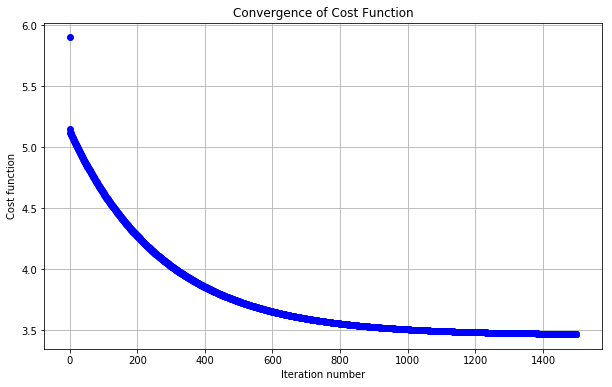

In [238]:
plotConvergence(cost)

In [239]:

#Plot the line on top of the data to ensure it looks correct
def myfit(xval):
    return thetaFinal[0,0] + thetaFinal[0,1]*xval

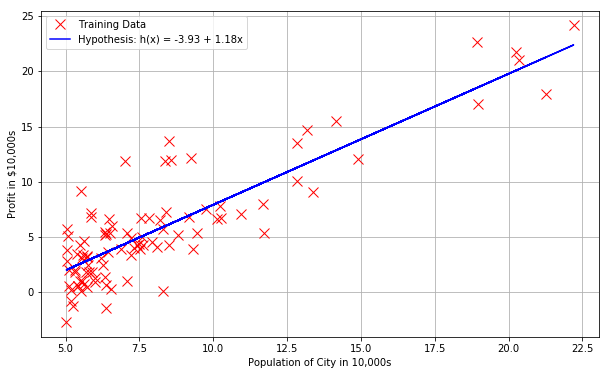

In [240]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'rx',markersize=10,label='Training Data')
plt.plot(X,myfit(X),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(thetaFinal[0,0],thetaFinal[0,1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

In [263]:
ex1data2 = "C:/Anaconda3/Notebooks/machine-learning-demo/courseraML/ex1/data/ex1data2.data"

In [264]:
housingData = pd.read_csv(ex1data2,sep=",",names=['size','bedrooms','price'],header=0)

In [265]:
housingData.head(5)

,size,bedrooms,price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [266]:
housingFeatures = housingData.loc[0:,['size', 'bedrooms']]

In [267]:
housingPrices = housingData.loc[0:,['price']]

In [268]:
X1=np.matrix(housingFeatures)

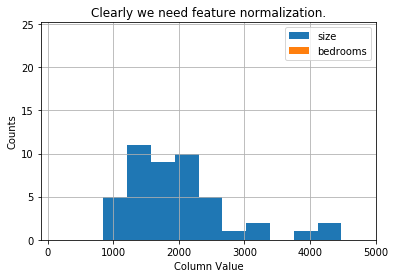

In [269]:
#Quick visualize data
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X1[:,0],label = 'size')
dummy = plt.hist(X1[:,1],label = 'bedrooms')

plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [293]:
#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X1.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

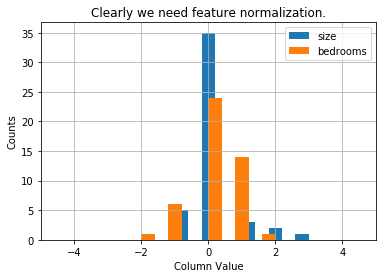

In [294]:
#Quick visualize data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'size')
dummy = plt.hist(Xnorm[:,1],label = 'bedrooms')

plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [295]:
Xnorm.shape, housingPrices.shape

((46, 2), (46, 1))

In [305]:
bias = np.ones((Xnorm.shape[0],1))
Xnorm =  np.append(bias, Xnorm,axis=1)
thetaFinal, cost = gradientDescent(Xnorm, np.matrix(housingPrices), alpha, iterations)

(1, 3) 3


In [306]:
thetaFinal

matrix([[ 322689.48918475,  122898.22156664,   17543.53219865]])

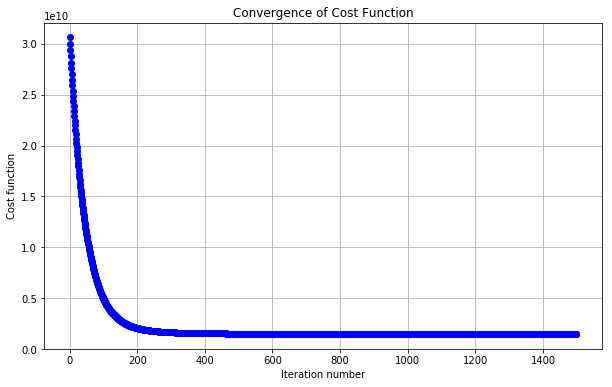

In [307]:
#Plot convergence of cost function:
plotConvergence(cost)

In [314]:
#print "Final result theta parameters: \n",theta
print ("Check of result: What is price of house with 600 square feet and 1 bedrooms?")
ytest = np.array([600.,1.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x]-stored_feature_means[x])/stored_feature_stds[x] for x in range(len(ytest))]
ytestscaled.insert(0,1)

np.sum(np.dot(thetaFinal, np.matrix(ytestscaled).T))

Check of result: What is price of house with 600 square feet and 1 bedrooms?


56240.487664418142

In [315]:
stored_feature_means, stored_feature_stds

([1998.4347826086957, 3.1739130434782608],
 [794.55315996323463, 0.76055894280590874])